In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


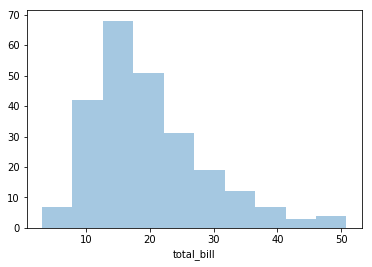

In [10]:
sns.distplot(tips["total_bill"], kde=False, bins=10)

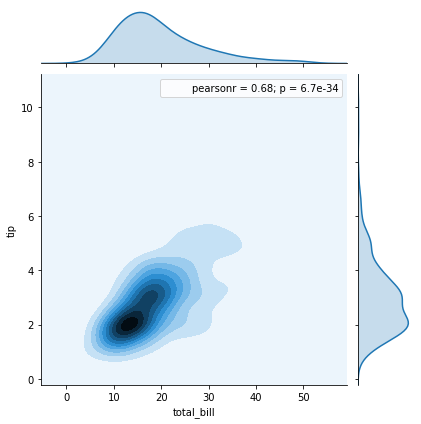

In [15]:
sns.jointplot(tips["total_bill"], tips["tip"], data=tips, kind="kde")

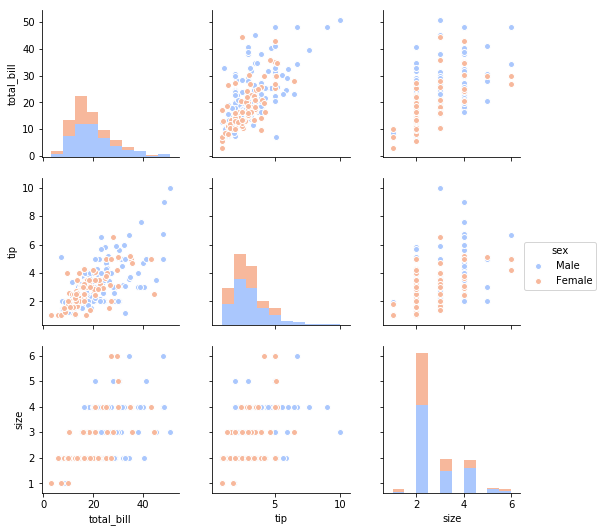

In [18]:
sns.pairplot(tips, hue="sex", palette="coolwarm")

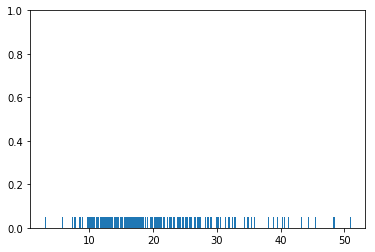

In [19]:
sns.rugplot(tips["total_bill"])

(0, 1)

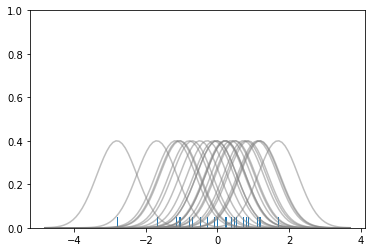

In [21]:
# Keine Sorge, ihr müsst diesen Code nicht verstehen!
# Er soll nur das nachfolgende Diagramm erzeugen
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Datensatz erstellen
dataset = np.random.randn(25)

# Ein weiteres rugplot erstellen
sns.rugplot(dataset);

# Die x-Achse des Plot einstellen
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 gleich verteilte Punkte von x_min bis x_max
x_axis = np.linspace(x_min,x_max,100)

# Die Bandbreite (en.: bandwidth) einstellen. Mehr Infos zur Bandbreite:
url = 'https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer#Satz_von_Nadaraya'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Eine leere Liste erstellen
kernel_list = []

# Jede Funktion visualisieren
for data_point in dataset:
    
    # Für jeden Punkt wird ein Kernel erstellt und der Liste angefügt
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Skalieren für die Darstellung
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

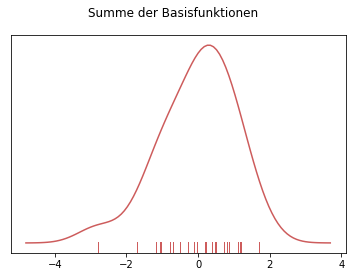

In [22]:
# Um das KDE-Plot zu erhalten können wir diese Funktionen summieren.

# Zeiche die Summe der Basisfunktionen
sum_of_kde = np.sum(kernel_list,axis=0)

# Diagramm zeigen
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Das erste rugplot hinzufügen
sns.rugplot(dataset,c = 'indianred')

# Die y-tick-Markierungen entfernen
plt.yticks([])

# Titel definieren
plt.suptitle("Summe der Basisfunktionen")

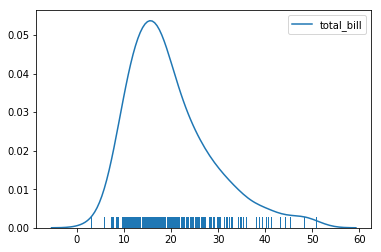

In [25]:
sns.kdeplot(tips["total_bill"])
sns.rugplot(tips["total_bill"])

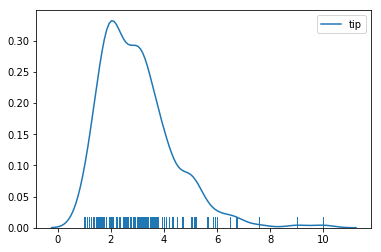

In [26]:
sns.kdeplot(tips["tip"])
sns.rugplot(tips["tip"])